In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/diabetes.csv"
df = pd.read_csv(file_path)

# Show the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##a)et a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.
(5 points)

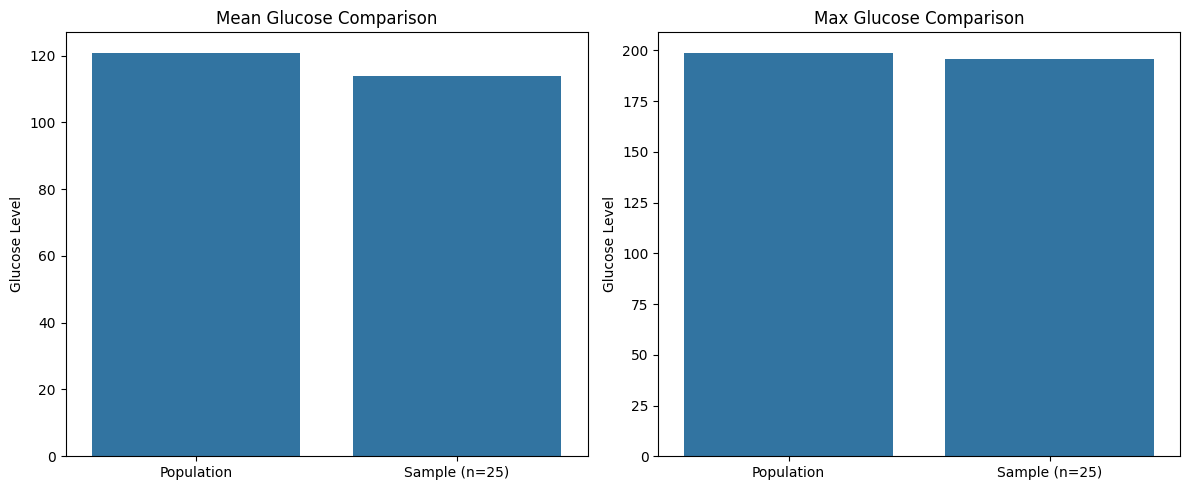

Population Mean Glucose: 120.89
Sample Mean Glucose: 113.92
Population Max Glucose: 199
Sample Max Glucose: 196


In [13]:
#required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed
np.random.seed(50)

# Taking a random sample of 25 observations
sample_25 = df.sample(n=25)

# mean and max statistics
population_mean_glucose = df["Glucose"].mean()
sample_mean_glucose = sample_25["Glucose"].mean()

population_max_glucose = df["Glucose"].max()
sample_max_glucose = sample_25["Glucose"].max()

# Plot comparison of mean and max Glucose
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# graph for Mean Glucose comparison
sns.barplot(x=["Population", "Sample (n=25)"],
            y=[population_mean_glucose, sample_mean_glucose], ax=ax[0])
ax[0].set_title("Mean Glucose Comparison")
ax[0].set_ylabel("Glucose Level")

# graph for max Glucose comparison
sns.barplot(x=["Population", "Sample (n=25)"],
            y=[population_max_glucose, sample_max_glucose], ax=ax[1])
ax[1].set_title("Max Glucose Comparison")
ax[1].set_ylabel("Glucose Level")

plt.tight_layout()
plt.show()


print(f"Population Mean Glucose: {population_mean_glucose:.2f}")
print(f"Sample Mean Glucose: {sample_mean_glucose:.2f}")
print(f"Population Max Glucose: {population_max_glucose}")
print(f"Sample Max Glucose: {sample_max_glucose}")


##b)Find the 98th percentile of BMI of your sample and the population and compare the results using charts. (5 points)

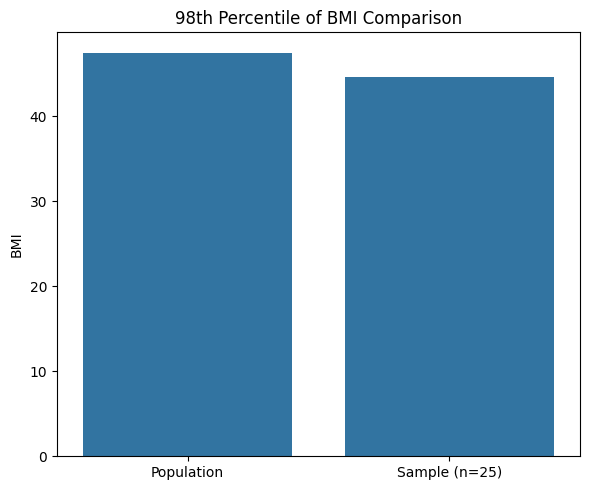

Population 98th Percentile of BMI: 47.53
Sample 98th Percentile of BMI: 44.68


In [14]:
# (b) Calculate the 98th percentile of BMI for both sample and population
population_bmi_98th = np.percentile(df["BMI"], 98)
sample_bmi_98th = np.percentile(sample_25["BMI"], 98)

# Plot comparison
plt.figure(figsize=(6, 5))
sns.barplot(x=["Population", "Sample (n=25)"], y=[population_bmi_98th, sample_bmi_98th])
plt.title("98th Percentile of BMI Comparison")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

print(f"Population 98th Percentile of BMI: {population_bmi_98th:.2f}")
print(f"Sample 98th Percentile of BMI: {sample_bmi_98th:.2f}")


##c)Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

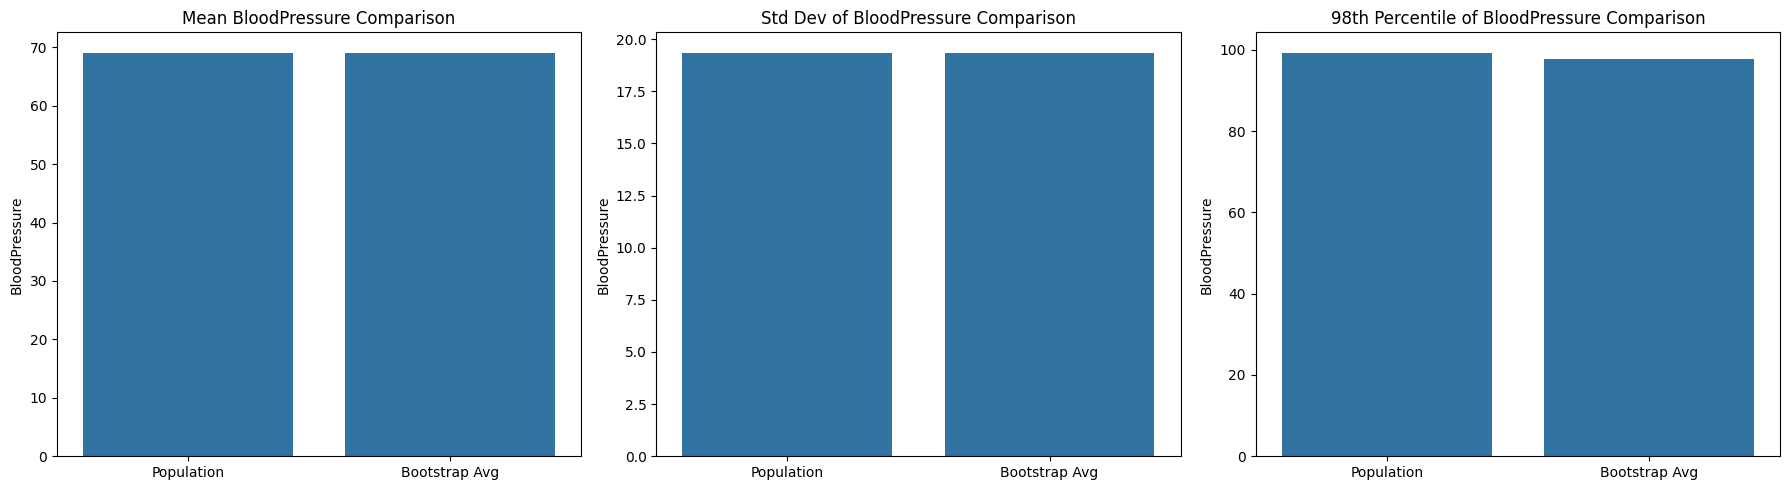

Population Mean BloodPressure: 69.11
Bootstrap Avg Mean BloodPressure: 69.04

Population Std Dev BloodPressure: 19.36
Bootstrap Avg Std Dev BloodPressure: 19.31

Population 98th Percentile BloodPressure: 99.32
Bootstrap Avg 98th Percentile BloodPressure: 97.63


In [17]:
#we intialize empty list to store mean,standard deviation and percentiles
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

#creates bootstrap samples
for _ in range(500):
    sample = df.sample(n=150, replace=True)
    bootstrap_means.append(sample["BloodPressure"].mean())
    bootstrap_stds.append(sample["BloodPressure"].std())
    bootstrap_percentiles.append(np.percentile(sample["BloodPressure"], 98))

# Calculate average of the bootstrap statistics
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_percentile = np.mean(bootstrap_percentiles)

# Population statistics for comparison
population_bp_mean = df["BloodPressure"].mean()
population_bp_std = df["BloodPressure"].std()
population_bp_98th = np.percentile(df["BloodPressure"], 98)

# Create comparison plots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Mean comparison
sns.barplot(x=["Population", "Bootstrap Avg"], y=[population_bp_mean, avg_bootstrap_mean], ax=ax[0])
ax[0].set_title("Mean BloodPressure Comparison")
ax[0].set_ylabel("BloodPressure")

# Std deviation comparison
sns.barplot(x=["Population", "Bootstrap Avg"], y=[population_bp_std, avg_bootstrap_std], ax=ax[1])
ax[1].set_title("Std Dev of BloodPressure Comparison")
ax[1].set_ylabel("BloodPressure")

# 98th Percentile comparison
sns.barplot(x=["Population", "Bootstrap Avg"], y=[population_bp_98th, avg_bootstrap_percentile], ax=ax[2])
ax[2].set_title("98th Percentile of BloodPressure Comparison")
ax[2].set_ylabel("BloodPressure")

plt.tight_layout()
plt.show()

print(f"Population Mean BloodPressure: {population_bp_mean:.2f}")
print(f"Bootstrap Avg Mean BloodPressure: {avg_bootstrap_mean:.2f}\n")

print(f"Population Std Dev BloodPressure: {population_bp_std:.2f}")
print(f"Bootstrap Avg Std Dev BloodPressure: {avg_bootstrap_std:.2f}\n")

print(f"Population 98th Percentile BloodPressure: {population_bp_98th:.2f}")
print(f"Bootstrap Avg 98th Percentile BloodPressure: {avg_bootstrap_percentile:.2f}")


The population mean BloodPressure is 69.11, while the bootstrap average mean is 69.04, showing only a slight difference. Similarly, the standard deviation of the population is 19.36, and the bootstrap average is 19.31 which is almost same. These minimal deviations suggest that the bootstrap distribution provides a reliable approximation of central tendency and variability.

However, the 98th percentile shows a slightly larger gap, with the population value at 99.32 and the bootstrap average at 97.63. This suggests that bootstrap sampling might slightly underestimate extreme percentile values, possibly due to fewer extreme values being captured repeatedly in random samples.

 Overall, the bootstrap approach performs well for estimating means and standard deviations but may slightly underrepresent extreme values in smaller samples.